Documentação da Análise Exploratória da base de dados de propriedades do Oleo 
Extraído de dados Publicos

##Imports

In [79]:
# Importação de bibliotecas 
from platform import python_version
print(f'Python Version {python_version()}')


import pandas as pd
print(f'Pandas Version {pd.__version__}')

from sklearn.tree import DecisionTreeRegressor, export 
from sklearn.metrics import r2_score,max_error, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 

Python Version 3.7.12
Pandas Version 1.1.5


##Dataset Creation

In [5]:
# Criação de DATASET 
df = pd.read_csv('PB-DATASET-API.csv')
df['OilGrav'] = round((141.5/(df['API']+131.5)),3)
display(df)

,PB,RS,GG,API,TEMP,OilGrav
0,4509,1409,0.799,42.5,260,0.813
1,3516,950,0.980,31.7,230,0.867
2,3811,909,0.732,38.0,180,0.835
3,4750,1280,0.756,38.6,180,0.832
4,4026,1052,0.767,37.4,193,0.838
...,...,...,...,...,...,...
722,2692,393,0.631,38.6,179,0.832
723,3420,1212,0.685,42.3,194,0.814
724,3160,1213,0.705,45.4,186,0.800
725,3063,586,0.628,32.2,180,0.864


In [6]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PB       727 non-null    int64  
 1   RS       727 non-null    int64  
 2   GG       727 non-null    float64
 3   API      727 non-null    float64
 4   TEMP     727 non-null    int64  
 5   OilGrav  727 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 34.2 KB
None


,PB,RS,GG,API,TEMP,OilGrav
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,2003.755158,633.861073,1.137160,34.927235,196.405777,0.852585
std,1441.172613,506.565126,0.434983,8.500812,53.221577,0.046343
min,79.000000,9.000000,0.521000,6.000000,74.000000,0.751000
25%,815.000000,267.000000,0.815000,30.800000,160.000000,0.825000
50%,1755.000000,514.000000,1.000000,37.400000,194.000000,0.838000
75%,2900.500000,833.500000,1.316500,40.000000,238.000000,0.872000
max,7142.000000,3299.000000,3.445000,56.800000,342.000000,1.029000


###Empirical Correlations

In [43]:
import math


df['Standing'] = round(18.2*(((df['RS']/df['GG'])**0.83)*10**((0.00091*df['TEMP'])-0.0125*df['API'])-1.4),2)

g = pd.DataFrame(df).to_numpy()
VasquezBeggs = []
glaso = []
gamags = []
A = []
x = []
PetroskiFarshad = []

for item in range(len(g)):
  if g[item][3] > 30:
    c1, c2, c3 = 56.18, 0.84246, -10.393
  else:
    c1, c2, c3 = 27.624, 0.914328, -11.172
  
  gamags.append(g[item][2]*(1+0.00005912*g[item][3]*60*math.log(164.7/114.7,10)))
  VasquezBeggs.append(round((c1*(g[item][1]/gamags[item])*10**(c3*(g[item][3]/(g[item][4]+460))))**c2,2))

  A.append(math.log(((g[item][1]/g[item][2])**0.816)*g[item][4]**0.173/g[item][3]**0.989,10))
  glaso.append(round(10**(1.7669+1.7447*A[item]-0.30218*(A[item]**2)),2))

df['Vasquez-Beggs'] = VasquezBeggs
df['Glaso'] = glaso
df['Al-Marhoun'] = round(0.00538088*(df['RS']**0.715082)*(df['GG']**(-1.87784))*(df['OilGrav']**3.1437)*((df['TEMP']+460)**1.32657),2)
df['Petroski-Farshad'] = round(112.727*(df['RS']**0.577421)/((df['GG']**0.8439)*10**(0.0007916*df['API']**1.541-0.000045618*(df['TEMP']**1.3911)))-1391.051,2)


display(df)


,PB,RS,GG,API,TEMP,OilGrav,Standing,Vasquez-Beggs,Glaso,Al-Marhoun,Petroski-Farshad
0,4509,1409,0.799,42.5,260,0.813,4544.39,4824.92,4643.88,4713.98,4934.83
1,3516,950,0.980,31.7,230,0.867,3538.33,3813.25,3816.93,2803.68,3667.77
2,3811,909,0.732,38.0,180,0.835,3262.55,3572.98,3748.39,3778.29,3881.62
3,4750,1280,0.756,38.6,180,0.832,4154.58,4551.22,4637.32,4491.23,4785.97
4,4026,1052,0.767,37.4,193,0.838,3707.83,4054.27,4140.29,3990.80,4273.19
...,...,...,...,...,...,...,...,...,...,...,...
722,2692,393,0.631,38.6,179,0.832,1793.31,1956.14,2095.59,2704.92,2243.28
723,3420,1212,0.685,42.3,194,0.814,3988.22,4317.88,4472.26,4994.00,4728.26
724,3160,1213,0.705,45.4,186,0.800,3501.79,3761.80,4091.66,4410.19,4144.63
725,3063,586,0.628,32.2,180,0.864,3039.45,3380.48,3512.53,4097.69,3815.93


##Data Vizualization

In [ ]:
#!pip install  plotly

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

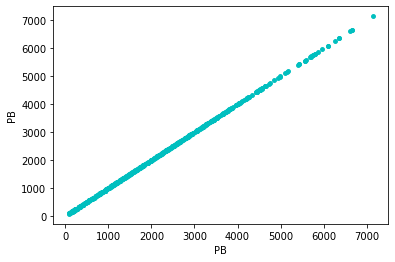

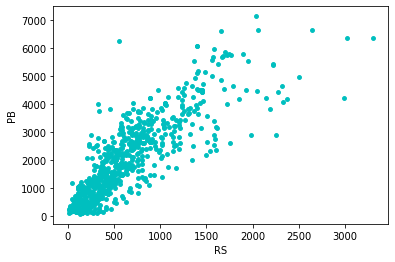

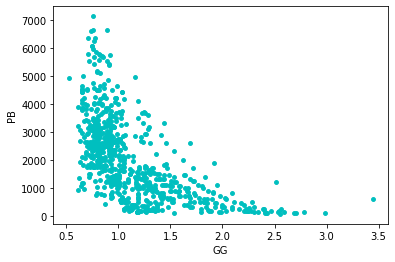

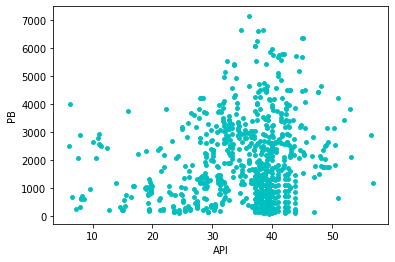

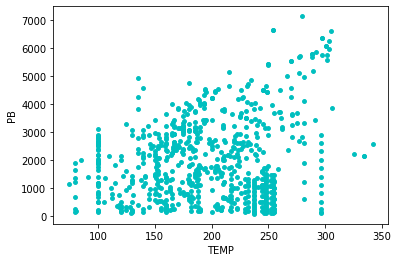

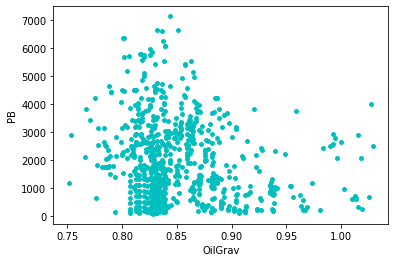

In [ ]:
import plotly.express as px

for coluna in df.columns:
    plt.scatter(df[coluna], df['PB'], color = 'c', marker = 'o', s = 15)
    plt.xlabel(coluna)
    plt.ylabel('PB')
    plt.show()

In [ ]:
#!pip install seaborn
import seaborn as sns

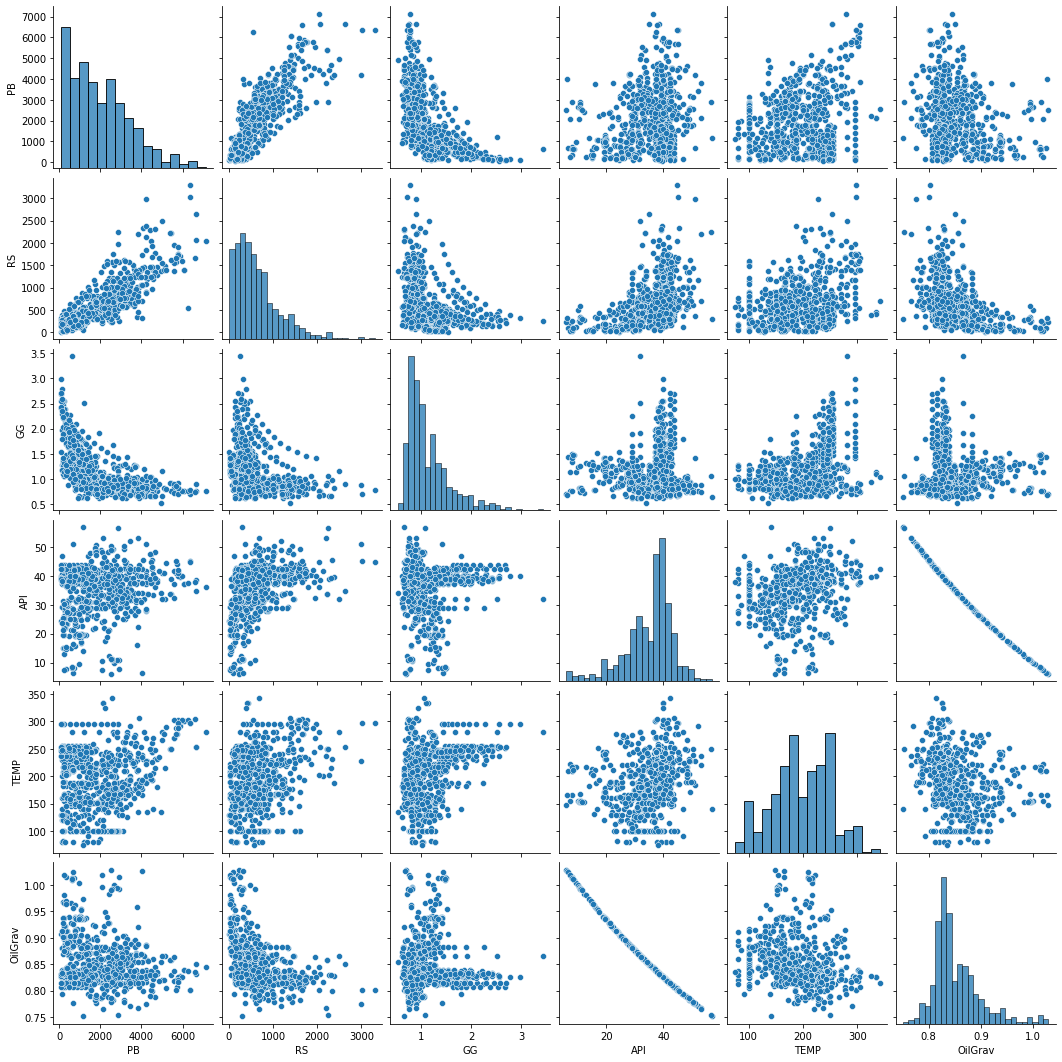

In [ ]:
sns.pairplot(df, palette="GnBu_d")

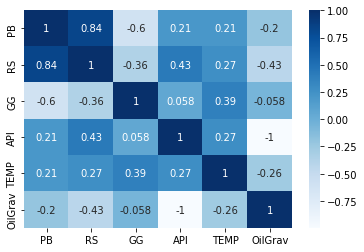

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues") #annot mostra os coeficientes da matriz

Podemos verificar a grande correlação da Razão de Gás Óleo (RS) com a Pressão de Bolha
Isto porque o RS também é um propriedade determinável pela Temperatura, dendidade específica do gás e do óleo, ou seja, RS = f(T, P, GasGrav, OilGrav).

O ideal seria criação de modelos preditivos de para todas as propriedades termodinâmicas e físico químicas e compará-las com as
correlações empíricas Standing, Vasquez-Beggs, Al-Marhoun, Petrosky-Farshad e etc...
No entando os procedimentos seriam semelhantes. 

Apesas da possibildiade de enfatizar a melhoria na preção por modelos criados por machine learning, este não será realizado.

No trabalho de conclusão de curso intitulado 

"MODELAGEM DE PROPRIEDADES FÍSICO QUÍMICAS E TERMODINÂMICAS DO ÓLEO E GÁS UTILIZANDO INTELIGÊNCIA ARTIFICIAL"

abordei a predição utilizando algumas ténicas presentes no ramo de machine learning para predição de Pb e Bo
e ainda comparei os resultados obtidos com os Softwares Python (Open Source) e Statistica®, produzido pela Tibco utilizando licença estudante e versão trial

#Dataset Split Test

In [51]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:5].values
y = df.iloc[:, 0].values

correlations_values = df.iloc[:, 6:11].values

print(correlations_values.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

correlations_train, correlations_test, y_trainf, y_testf = train_test_split(correlations_values, y, test_size=0.33, random_state=0)

correlations = ['Standing', 'Vasquez-Beggs', 'Glaso', 'Al-Marhoun','Petroski-Farshad']

df_test = pd.DataFrame(correlations_test, columns= correlations)
df_test['PB'] = y_test



(727, 5)


,Standing,Vasquez-Beggs,Glaso,Al-Marhoun,Petroski-Farshad,PB
0,260.22,293.25,174.87,124.82,-691.53,163
1,3155.07,3498.23,3643.17,3331.44,3676.08,3311
2,2385.03,2457.68,2398.23,1099.77,1907.13,1715
3,1963.79,2127.25,2287.47,2517.58,2316.49,1744
4,4235.56,4565.69,4505.39,3535.84,4419.33,3573
...,...,...,...,...,...,...
235,289.34,320.66,193.13,126.67,-654.36,113
236,2105.41,2272.03,2543.56,1863.67,2207.30,2631
237,3709.83,4127.93,4187.07,3416.82,4106.73,3728
238,616.39,670.19,556.30,831.39,240.52,840


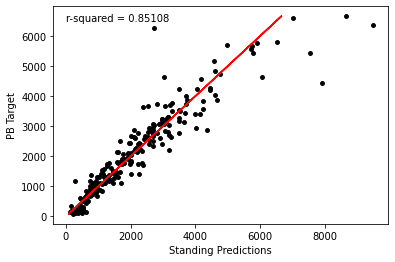

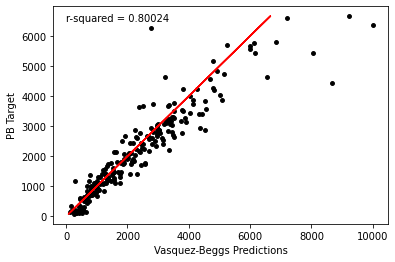

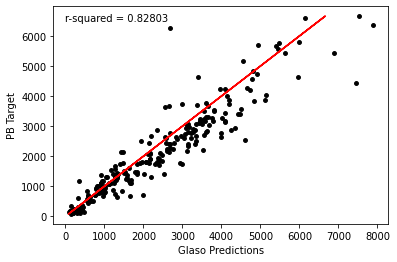

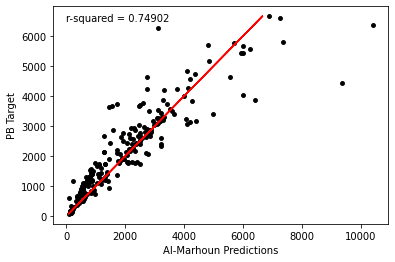

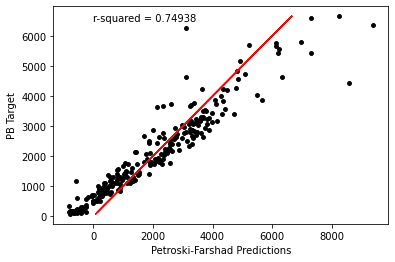

In [55]:
correlations = ['Standing', 'Vasquez-Beggs', 'Glaso', 'Al-Marhoun','Petroski-Farshad']

for coluna in correlations:
    plt.scatter(df_test[coluna], df_test['PB'], color = 'k', marker = 'o', s = 15)
    plt.xlabel(coluna + ' Predictions')
    plt.ylabel('PB Target')
    plt.plot(df_test['PB'], df_test['PB'], color = 'r')
    r2 = round(r2_score(df_test['PB'],df_test[coluna]),5)
    plt.annotate(f'r-squared = {r2}', (0,6500))
    plt.show()

#Motivation

Nas figura acima são demostradas o grau de dispersão dos valores predito pelas correlações empíricas em relação
aos valores verdadeiros de pressão de bolha determinados por métodos experimentais

Observa-se que as correlações apresentam grandes dispersões na determinição de valores altos de Pressão de Bolha, evidenciando as limitações das correlações empíricas hoje amplamente utilizadas. 

Por este e por outros motivos, a utilização do aprendizado de máquina (AM) surge como alternativa para geração de modelos que melhor se adaptam aos dados que se possuem. Nos modelos gerados por AM são métricas de eficiência do poder de predição e quanto ao poder de generalização. 

Modelos superajustados (overffiting) e sobreajustados (underfitting) não são desejáveis, com isso são variados parâmetros com o objetivo de se obter um modelo genalizado capaz de prover saídas confiáveis à dados não utilizados no treinamento do mesmo.



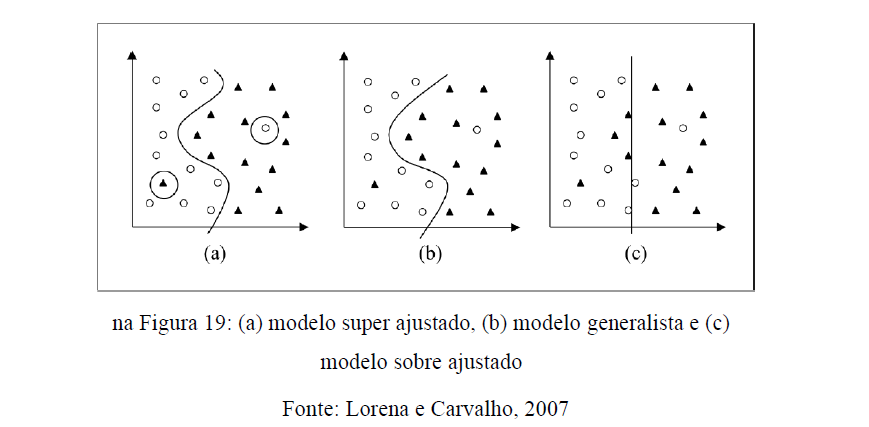

A proposta do trabalho foi gerar diferentes modelos de predição utilizando o aprendizado de máquinas, selecionando os hiperparâmetros que possibilitam a obtenção de valores da propriedade em questão com menor erro associado. 

Para quantificação dos resultados foi utilizada uma espécies de raqnueamento por Ikiensikimama e Azubuike, 2012, no qual é realizado um somatório da multiplicação dos pesos atribuídos a diferentes avaliadores estatíticos com as respectivas méticas de erros medidas, como é mostrado abaixo:




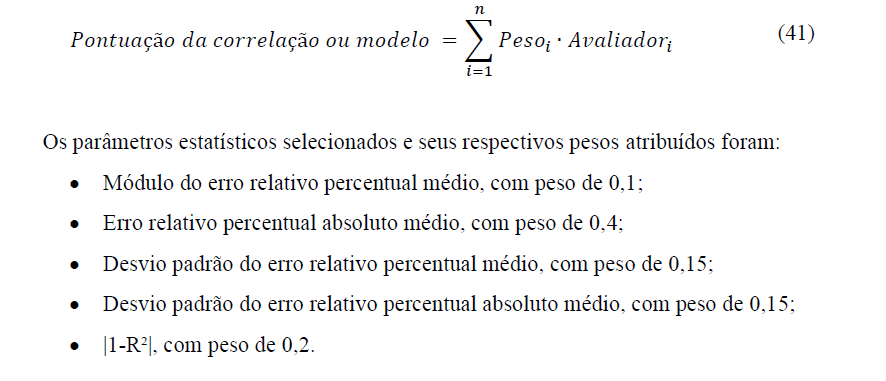


#Árvores de Decisão

In [59]:
from sklearn.tree import DecisionTreeRegressor, export


#Variação de hiperparâmetros 
#Comprimento Total da árvore
i= 2
#Número minimo de amostras para divisão e criação de nodos
j= 2
#Número minimo de amostras para criação de folhas
k= 2
Contador = 1
melhorr2 = 0
ID = []
r2 = []

while (i < 31):
    j = 2
        
    while (j < 50):        
        k = 2    
        
        while (k < 50):
            linha = []
            Regressor = DecisionTreeRegressor(criterion='mse', max_depth= i,
                                          min_samples_split= k, 
                                          min_samples_leaf= j,
                                          random_state=0)
            
            Regressor.fit(X_train, y_train)
            Resultado = Regressor.predict(X_test)
            precisao = r2_score(y_test, Resultado)
            linha.append(Contador)
            linha.append(i)
            linha.append(j)
            linha.append(k)
            linha.append(precisao)
         
                    
            if melhorr2 < precisao:
                #melhor parâmetros encontrado                
                melhorr2 = precisao
                maxdep = i
                minsamplessplit = j
                minsamplesleaf = k
                IDbest = Contador
            
            r2.append(linha)
            Contador = Contador + 1
            ID.append(Contador)
            k = k + 2    
        j = j + 2
    i = i + 4

melhor=[]
melhor.append(IDbest)
melhor.append(maxdep)
melhor.append(minsamplessplit)
melhor.append(minsamplesleaf)
melhor.append(melhorr2)
print ('Melhor Árvore')
print (melhor)

#exportar layout da árvore de decisão
Regressor = DecisionTreeRegressor(criterion='mse', max_depth= maxdep,
                                          min_samples_split= minsamplessplit, 
                                          min_samples_leaf= minsamplesleaf,
                                          random_state=0)
Regressor.fit(X_train, y_train)
Resultado = Regressor.predict(X_test)
R2_test = round(r2_score(y_test, Resultado),5)

Obs_Pred_Linha = []
for valor in range(len(Resultado)):
    Obs_Pred_Linha.append([y_test[valor], Resultado[valor]]) 

RelatorioValores= pd.DataFrame(data = Obs_Pred_Linha, columns = ['Obs',
                                                                 'Predito'] )
Treinamento = Regressor.predict(X_train)

Obs_Pred_Treinamento_Linha = []
for valor in range(len(X_train)):
    Obs_Pred_Treinamento_Linha.append([y_train[valor], X_train[valor]]) 

R2_treinamento = round(r2_score(y_train, Treinamento),5)


Melhor Árvore
[1729, 14, 2, 2, 0.8570708740350333]


 R2_Train = 0.97643
 R2_test = 0.91325


,MAE,Emax,MSE,R2
0,250.603127,3969.284573,186632.762329,0.913254


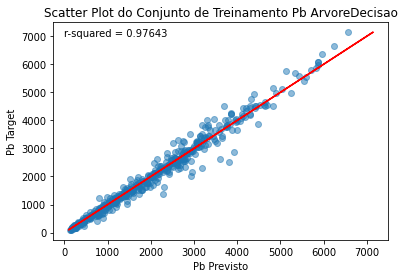

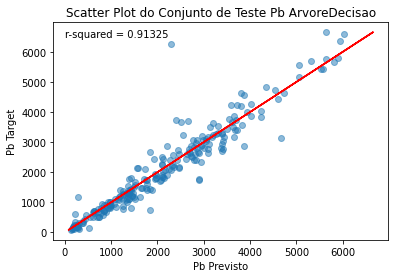

In [63]:
print(f' R2_Train = {R2_treinamento}')
print(f' R2_test = {R2_test}')

ListaStatis = []
MatrizStatis = []
#ListaStatis.append(mean_absolute_percentage_error(y_test, Resultado))
ListaStatis.append(mean_absolute_error(y_test, Resultado))
ListaStatis.append(max_error(y_test, Resultado))
ListaStatis.append(mean_squared_error(y_test, Resultado))
ListaStatis.append(r2_score(y_test, Resultado))

MatrizStatis.append(ListaStatis)

statistica = pd.DataFrame(data = MatrizStatis, columns = ['MAE','Emax','MSE',
                                                          'R2'] )
display(statistica)

plt.scatter(Treinamento, y_train, alpha=0.5)
plt.plot(y_train, y_train, color = 'red')
plt.title('Scatter Plot do Conjunto de Treinamento Pb ArvoreDecisao')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_treinamento}', (0,7000))
plt.show()

plt.scatter(Resultado, y_test, alpha=0.5)
plt.plot(y_test,y_test, color = 'red')
plt.title('Scatter Plot do Conjunto de Teste Pb ArvoreDecisao')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_test}', (0,6500))
plt.show()

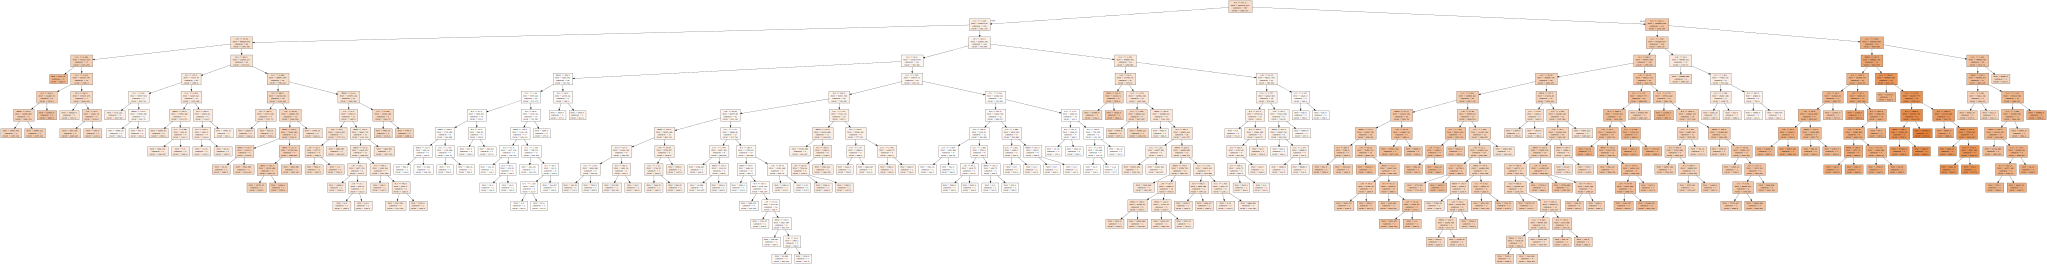

In [61]:
import graphviz
DT = tree.export_graphviz(Regressor, out_file =None,
                       feature_names = ['RS','GG','API','Temp'],
                       filled=True, leaves_parallel=False)

# Draw graph
graph = graphviz.Source(DT, format="png") 
graph

#Random Forest

[7, 14, 0.9199667570260444]


,Index,Quatidade de Árvores,R2
0,1,2,0.888634
1,2,4,0.906357
2,3,6,0.912686
3,4,8,0.919369
4,5,10,0.918144
5,6,12,0.918515
6,7,14,0.919967
7,8,16,0.916278
8,9,18,0.915174
9,10,20,0.913294


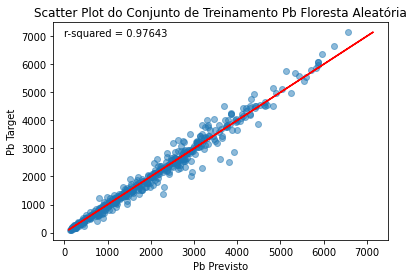

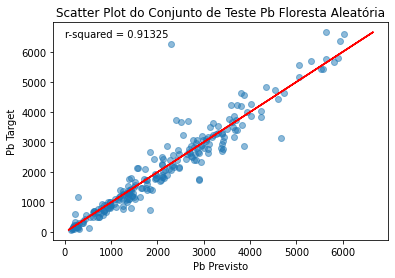

In [67]:
from sklearn.ensemble import RandomForestRegressor

#variação de parâmetros
i = 2



Contador = 1
melhorr2 = 0
ID = []
r2 = []
Obs_Pred_Linha = []
Resultado_test = []

while (i < 25):    
    linha = []
    
    Regressor = RandomForestRegressor(n_estimators = i,
                                              criterion='mse', 
                                              max_depth= maxdep,
                                              min_samples_split= minsamplessplit, 
                                              min_samples_leaf= minsamplesleaf,
                                              random_state = 0)
            
    Regressor.fit(X_train,y_train)
    Resultado = Regressor.predict(X_test)
    precisaoatual = r2_score(y_test, Resultado)
    linha.append(Contador)
    linha.append(i)
    linha.append(precisaoatual)
    r2.append(linha)
    
    Resultado_test.append(["",i])    
    for valor in range(len(Resultado)):
        result_test = Regressor.predict(X_train)
        Resultado_test.append([y_test[valor], result_test[valor]]) 
                             
    if melhorr2 < precisaoatual:
        #melhor parâmetros encontrado                
        melhorr2 = precisaoatual
        n_trees_best = i
        IDbest = Contador

    Contador = Contador + 1
    ID.append(Contador)     
    i = i + 2  
    
    
melhor=[]
melhor.append(IDbest)
melhor.append(n_trees_best)
melhor.append(melhorr2)
print (melhor)

TEST= pd.DataFrame(data = r2, columns= ['Index','Quatidade de Árvores','R2'])
TEST.set_index('Index')
display(TEST)

Treinamento = Regressor.predict(X_train)
R2_treinamento = round(r2_score(y_train, Treinamento),5)

Resultado = Regressor.predict(X_test)
R2_test = round(r2_score(y_test, Resultado),5)

plt.scatter(Treinamento, y_train, alpha=0.5)
plt.plot(y_train, y_train, color = 'red')
plt.title('Scatter Plot do Conjunto de Treinamento Pb Floresta Aleatória')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_treinamento}', (0,7000))
plt.show()

plt.scatter(Resultado, y_test, alpha=0.5)
plt.plot(y_test,y_test, color = 'red')
plt.title('Scatter Plot do Conjunto de Teste Pb Floresta Aleatória')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_test}', (0,6500))
plt.show()

#ANN

#SVR

#RESULTADOS